In [47]:
import pandas as pd 

df = pd.read_csv("dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Load Dataset

#  Heart Disease Dataset Features

- **age** → Age of the patient (in years).  
- **sex** → Sex of the patient (1 = male, 0 = female).  
- **cp (chest pain type)** → Chest pain category (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic).  
- **trestbps (resting blood pressure)** → Resting blood pressure (in mm Hg) measured on admission.  
- **chol (serum cholesterol)** → Serum cholesterol level (mg/dl).  
- **fbs (fasting blood sugar)** → Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).  
- **restecg (resting electrocardiographic results)** → Results of resting ECG (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).  
- **thalach (maximum heart rate achieved)** → Maximum heart rate achieved during exercise.  
- **exang (exercise induced angina)** → Exercise-induced angina (1 = yes, 0 = no).  
- **oldpeak** → ST depression induced by exercise relative to rest (numeric value).  
- **slope** → Slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).  
- **ca (number of major vessels colored by fluoroscopy)** → Count of major blood vessels (0–3).  
- **thal** → Thalassemia test result (1 = normal, 2 = fixed defect, 3 = reversible defect).  
- **target** → Presence of heart disease (1 = yes, 0 = no).  


In [48]:
df.shape

(1025, 14)

In [49]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

# Train Test Split

In [50]:
from sklearn.model_selection import train_test_split

X = df.drop("target",axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

# Training & Evaluating Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

models = {
    'LogisticRegression': LogisticRegression(),
    'Decision_Tree':DecisionTreeClassifier(),
    'Randome_Forest':RandomForestClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    # Train Model
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    # Eval Model
    print(f"----------{name}----------")
    print("Report \n", classification_report(y_test, y_pred))
    print("Confusion \n", confusion_matrix(y_test, y_pred))
    print("\n\n")

----------LogisticRegression----------
Report 
               precision    recall  f1-score   support

           0       0.91      0.72      0.81        58
           1       0.72      0.91      0.80        45

    accuracy                           0.81       103
   macro avg       0.82      0.82      0.81       103
weighted avg       0.83      0.81      0.81       103

Confusion Matrix 
 [[42 16]
 [ 4 41]]



----------Decision_Tree----------
Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.93      0.97        45

    accuracy                           0.97       103
   macro avg       0.98      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103

Confusion Matrix 
 [[58  0]
 [ 3 42]]



----------Random_Forest----------
Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.

# Selecting Best Model

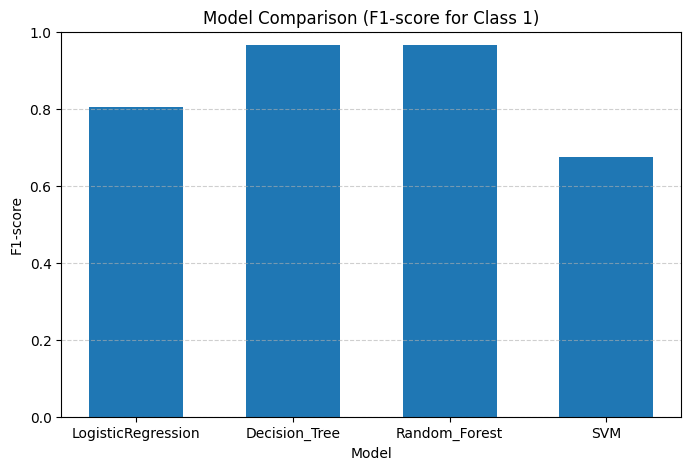

✅ Best model: Decision_Tree (F1-score = 0.9655)


In [54]:
import matplotlib.pyplot as plt

# Create a dictionary to store all model F1-scores
f1_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_scores[name] = report['1']['f1-score']

# Plot the F1-scores for each model
plt.figure(figsize=(8, 5))
plt.bar(f1_scores.keys(), f1_scores.values(), width=0.6)
plt.title("Model Comparison (F1-score for Class 1)")
plt.xlabel("Model")
plt.ylabel("F1-score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Print best model again for clarity
print(f"✅ Best model: {best_model_name} (F1-score = {best_score:.4f})")


# Save Model

In [ ]:
import pickle
pickle.dump(model, open("model.pkl",'wb'))
# Save Best Model
if best_model:
    pickle.dump(best_model, open("best_model.pkl", 'wb'))
    print(f"\nBest model ({best_model_name}) saved as 'best_model.pkl'")



Best model (Decision_Tree) saved as 'best_model.pkl'


In [23]:
import pandas as pd
import pickle

# Load model
loaded_model = pickle.load(open("best_model.pkl", 'rb'))

# Healthy patient example
sample = pd.DataFrame([{
    "age": 40,
    "sex": 0,
    "cp": 0,
    "trestbps": 110,
    "chol": 180,
    "fbs": 0,
    "restecg": 0,
    "thalach": 110,
    "exang": 0,
    "oldpeak": 0.0,
    "slope": 0,
    "ca": 0,
    "thal": 1
}])

# Predict
prediction = loaded_model.predict(sample)
print("Predicted class:", prediction)


Predicted class: [1]
